In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/song-popularity/dataset.csv


### Импорт необходимых библиотек


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

### Чтение файла

In [3]:
data = pd.read_csv ('/kaggle/input/song-popularity/dataset.csv')

In [4]:
# Вывод таблицы
data

# Вывод размера таблицы, чтобы обозначить объем входных данных
data.shape

(114000, 21)

In [5]:
# Вывод типов данных в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11


## Значение столбцов таблицы в dataset
##### track_id - индификатор трека
##### artist - имена артистов, испольняющих трекa
##### album_name - название альбома
##### track_name - название трека из альбома
##### popularity - популярность трека(от 0 до 100, где 100 - самый поулярный трек. Основывается на общем прослушивании трека и даты реализации)
##### Популярность артистов и их альбомов оценивается исходя от популярности трека
##### duration_ms - длительность трека(милисекунды)
##### explicit - откровенность трека( True - да, False - нет или данных нет)
##### danceability - оценка уровня пригодности трека для танцев под него ( 0.0 - не подходит, 1.0 - подходит)
##### energy - мера интентивсности трека ( 0.0 - медленные и спокойные треки, 1.0 - быстрые и громкие)
##### key - ключ трека ( числа соответсвуют нотам)
##### loudness - громкость трека в децибелахmode - модальность трека ( 1 - мажор, 0 - минор)
##### speechiness - оценка уровня слов в треке ( 1.0 - сплошной текст, 0.0 - текст отсутствует полность)
##### acousticness - акустический ли трек (1 - да, 0 - нет)
##### instrumentalness - Оценка вероятности того, что трек является инструментальным (0.0 — не инструментальный, 1.0 — инструментальный)
##### liveness - Оценка вероятности того, что трек записан в живом исполнении (0.0 — нет, 1.0 — да)
##### valence - Оценка эмоционального состояния трека (0.0 — отрицательные эмоции, 1.0 — положительные эмоции)
##### tempo - темп трека (обычно в ударах в минуту)
##### time_signature - Подпись времени трека (например, 4/4, 3/4 и т. д.)
##### track_genre - жанр трека



In [6]:
# столбцы в таблице
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [7]:
# Наличие пропусков в данных
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
# удаляем пропуски
data = data.dropna()

In [9]:
# Проверка успешно ли выполнена функция удаления
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
#Удаления столбца Unnamed, так как он не несет никакого смысла
data = data.drop(data.columns[0], axis=1)

# Kак длительность песни влияет на ее популярность и восприятие аудитории

In [11]:
#Преобразование столбца с длительностью из миллисекунд в минуты
data['duration_ms'] = data['duration_ms']/60000

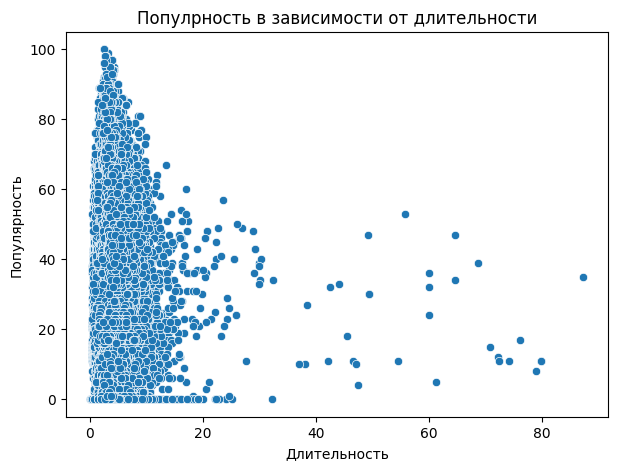

In [12]:
plt.figure(figsize=(7,5))

sns.scatterplot(data=data, x='duration_ms', y='popularity')

plt.title('Популрность в зависимости от длительности')
plt.xlabel('Длительность')
plt.ylabel('Популярность')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


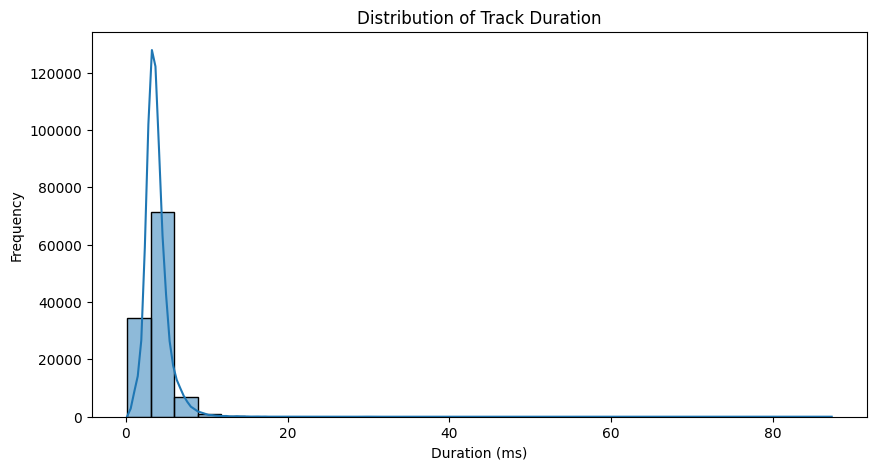

In [13]:
# Шаг 6: Распределение длительности треков
plt.figure(figsize=(10, 5))
sns.histplot(data['duration_ms'], bins=30, kde=True)
plt.title('Distribution of Track Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()

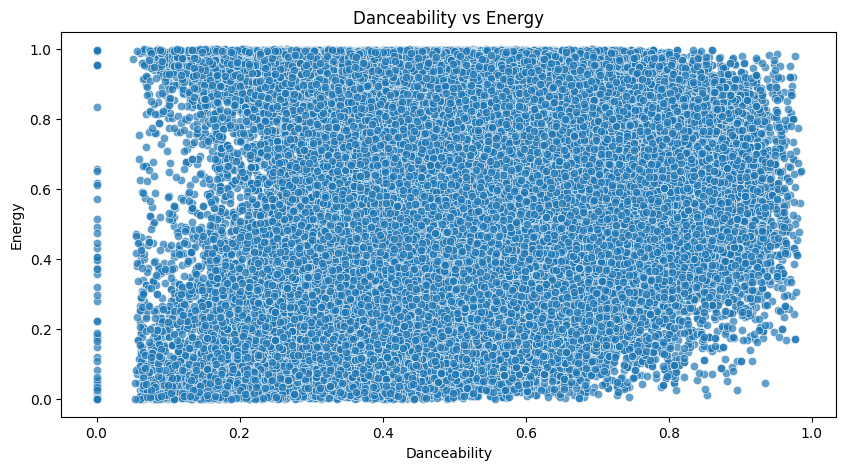

In [14]:
#Корреляция между danceability и energy
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='danceability', y='energy', alpha=0.7)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

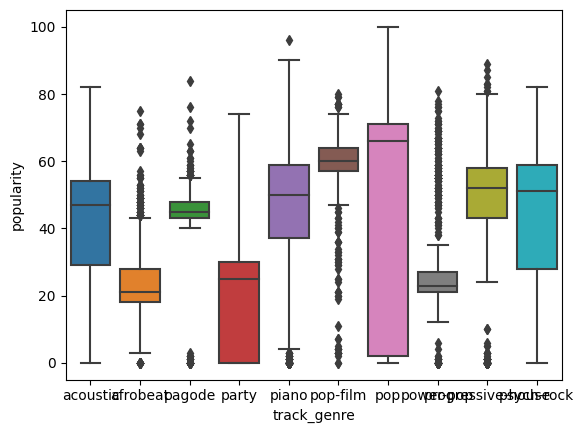

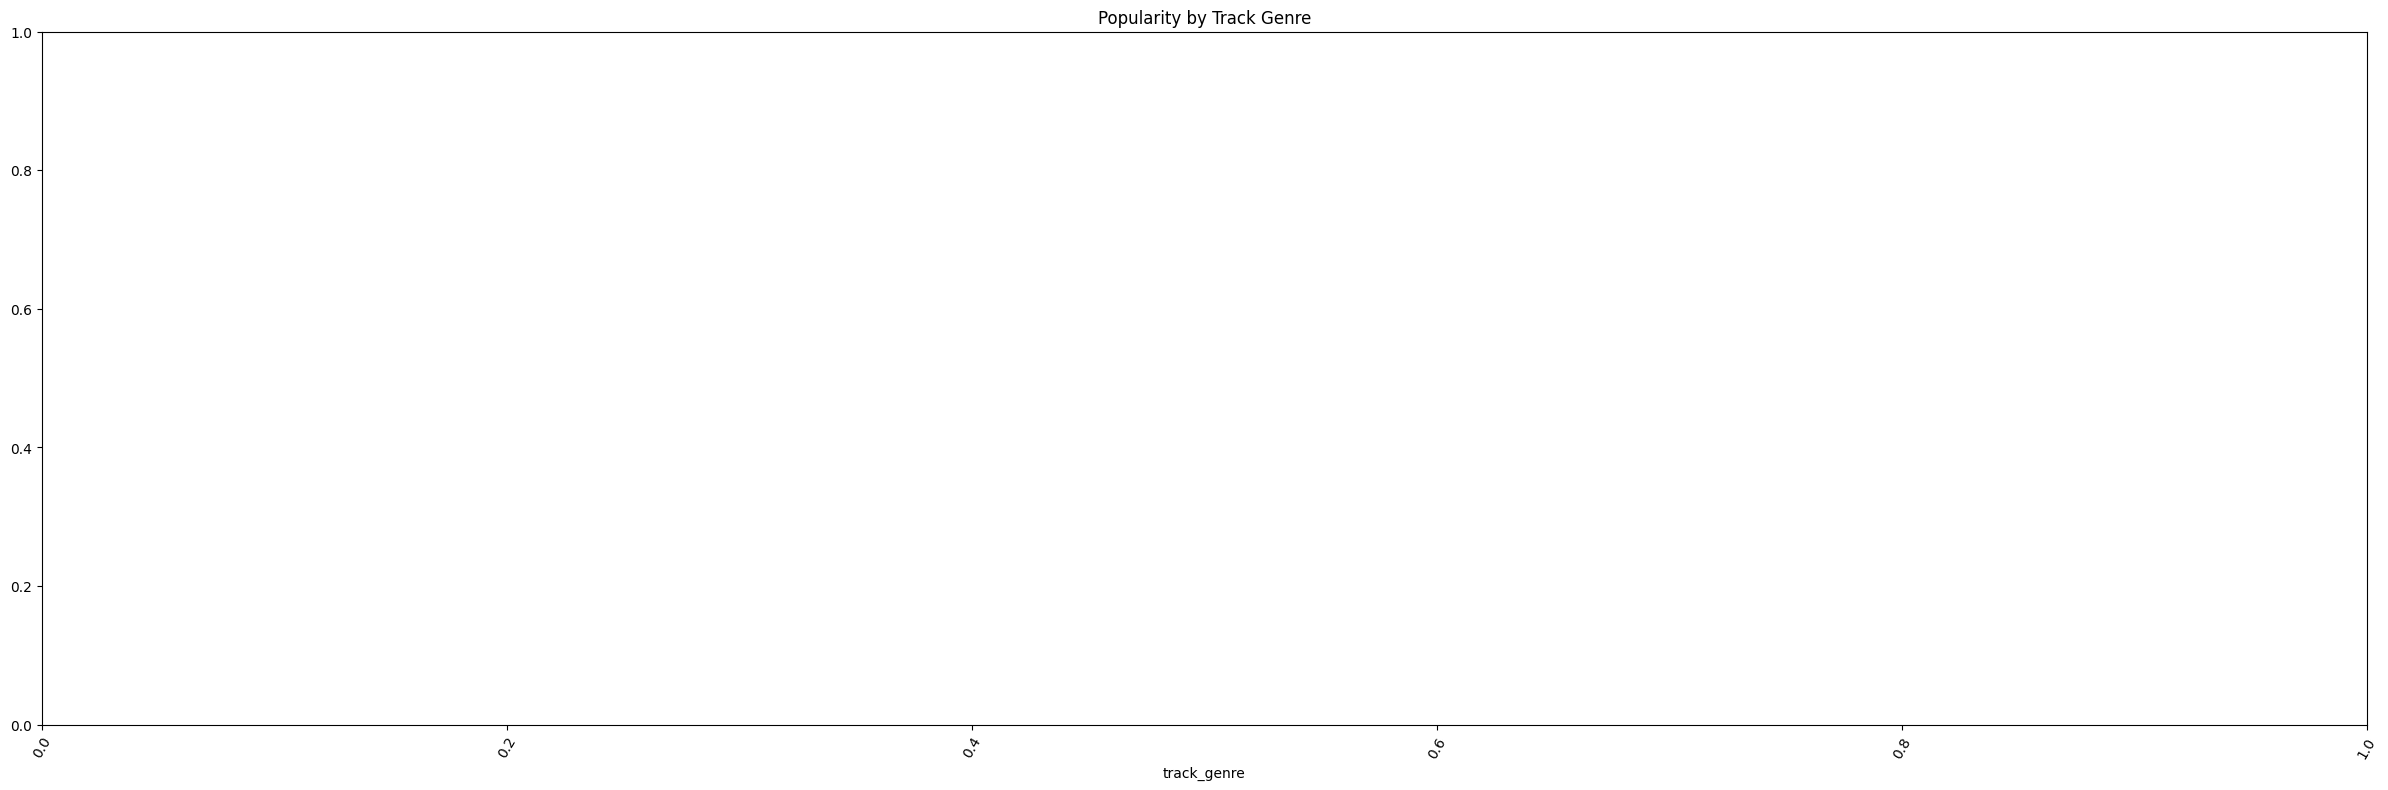

In [15]:
# Шаг 4: Анализ популярности по жанрам
top_5 = data['track_genre'].value_counts().head(10).index

sort_data = data[data['track_genre'].isin(top_5)]

sns.boxplot(data=sort_data, x='track_genre', y='popularity')

plt.figure(figsize=(30,9))


plt.title('Popularity by Track Genre')
plt.xlabel('track_genre')
plt.xticks(rotation=60)
plt.show()

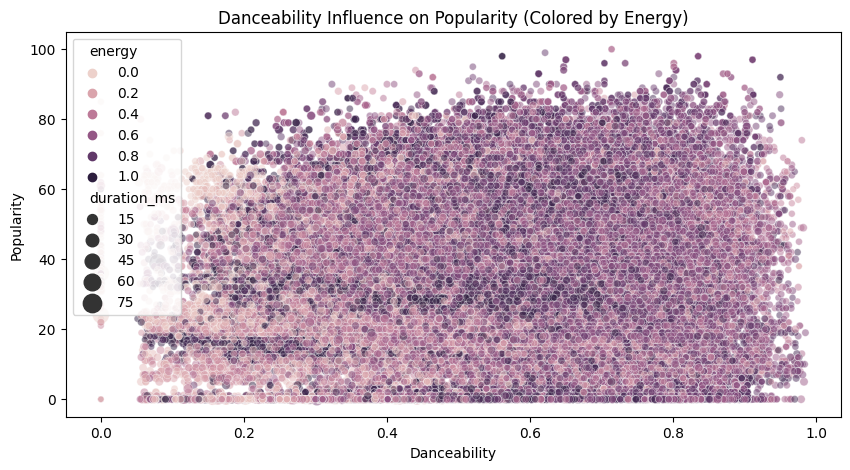

In [16]:
# Шаг 5: Анализ влияния danceability и energy на популярность
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='danceability', y='popularity', hue='energy', size='duration_ms', sizes=(20, 200), alpha=0.5)
plt.title('Danceability Influence on Popularity (Colored by Energy)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

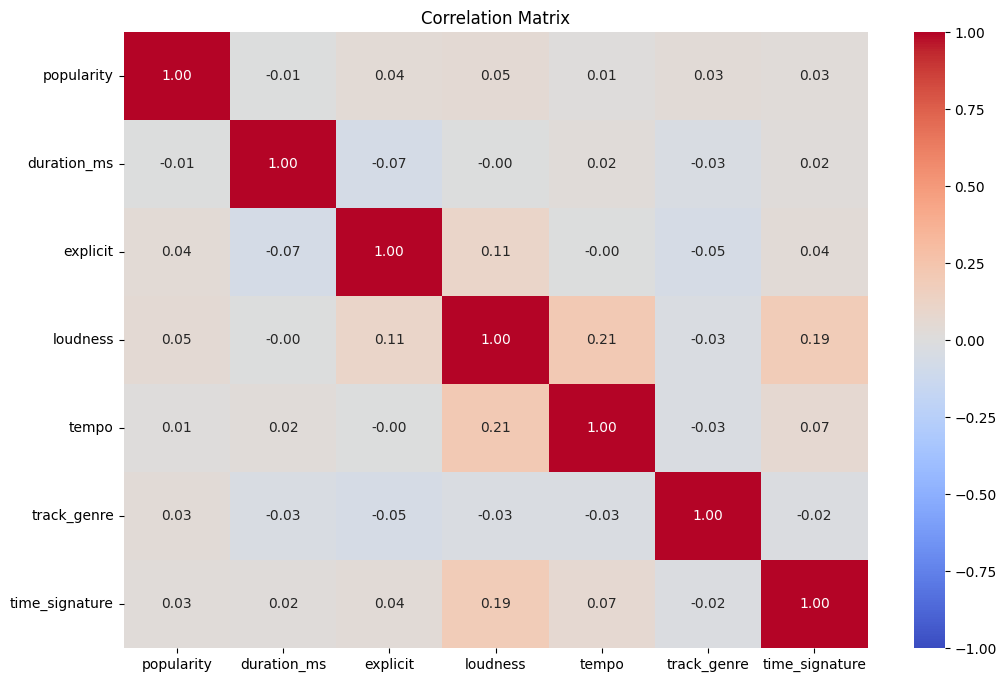

In [17]:
correlation_data = data[['popularity', 'duration_ms', 'explicit', 'loudness', 'tempo', 'track_genre', 'time_signature']].copy()

#  Преобразование категориальной переменной track_genre в числовую для корреляции
correlation_data['track_genre'] = correlation_data['track_genre'].astype('category').cat.codes

# Преобразование explicit в int
correlation_data['explicit'] = correlation_data['explicit'].astype(int)  


correlation_matrix = correlation_data.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering


# План 
### 1. Определить категориальные и числовые знаения по соответствующим столбцам
### 2. Удалить ненужные столбцы
### 3. Закодировать жанры
### 4. Cоздать новые признаки
### 5. Проверить числовые значения на отклонения
### 6. Провести нормализацию, при обнаружении отклонений


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  float64
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

### ШАГ 1 - Определяем категориальные и числовые столбцы

In [19]:
# необходимо преобразовать знаяения из bool в int
data.explicit = data.explicit.apply(int)

In [20]:
# Создание категориальных(данные типо object и int)
# Оценка (по шкале) отностится к категориальным значениям
# Поэтому все значения типа int я тоже добавляю в категориальные столбцы и удаляю из числовых 

cat_cols = data.select_dtypes(include=['object']).columns.to_list()
cat_cols.extend(['explicit', 'key', 'mode', 'time_signature'])

num_cols = data.select_dtypes(include=['number']).columns.to_list()
for i in ['explicit', 'key', 'mode', 'time_signature']:
    num_cols.remove(i)

# Получаем уникальные значения каждого числового слобца
num_cols_nunique = data[num_cols].nunique()
cat_cols_nunique = data[cat_cols].nunique()

num_cols_nunique
cat_cols_nunique

track_id          89740
artists           31437
album_name        46589
track_name        73608
track_genre         114
explicit              2
key                  12
mode                  2
time_signature        5
dtype: int64

### ШАГ 2 - Удаляем ненужные столбцы

In [21]:
data = data.drop(['track_id', 'artists', 'album_name',
                     'track_name', 'key', 'explicit'], axis=1)

### ШАГ 3 - Кодировка жанров

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['genre_encoded'] = label_encoder.fit_transform(data['track_genre'])

In [23]:
# уаляем исходный столбец с жанрами
data = data.drop(['track_genre'], axis=1)

### ШАГ 4 - Создание новых признаков

### ШАГ 5 - Проверка числовых значение на наличие отклонения

In [24]:
data[num_cols].skew()

popularity           0.046393
duration_ms         11.195826
danceability        -0.399505
energy              -0.597005
loudness            -2.006541
speechiness          4.647493
acousticness         0.727321
instrumentalness     1.734392
liveness             2.105728
valence              0.115097
tempo                0.232308
dtype: float64

##### Вывод - есть разбросы (отредактировать)

### ШАГ 6 - Нормализация данных

In [25]:
normalized_data = data.copy()
standard_scaler = StandardScaler()

normalized_data[num_cols] = standard_scaler.fit_transform(data[num_cols])


In [26]:
data

,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_encoded
0,73,3.844433,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,55,2.493500,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,57,3.513767,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,71,3.365550,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,82,3.314217,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,6.416650,0.172,0.2350,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,22,6.416667,0.174,0.1170,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,22,4.524433,0.629,0.3290,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,41,4.731550,0.587,0.5060,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


In [27]:
features = data.columns.to_list()

#  Удаляю popularity, так как он будет целевой переменной
features.remove('popularity')

target = 'popularity'

# Эксперементы с моделями машинного обучения/глубокого обучения

In [29]:
from sklearn.linear_model import LinearRegression

### Линейная регрессия с/без кросс-валидации

### дерево с/без кросс-валидаций
### градиентный бустинг с\без

###### нужен график сравнения(или просто вывод) после каждой модели
###### 5 фолдов!
# вывод общий